---
---

# Linear Models 

---


## Logistic Regression

### 1. Logistic Function (Sigmoid Function)
The logistic function transforms any real-valued number into a value between 0 and 1, making it suitable for binary classification.

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

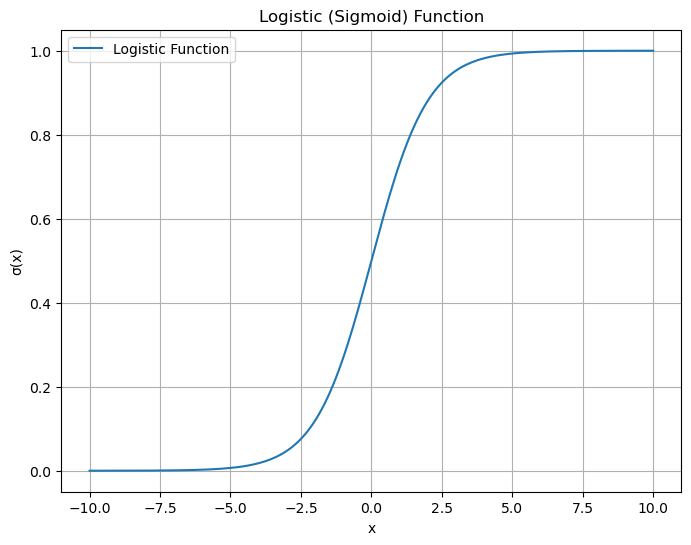

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Generate data points
x = np.linspace(-10, 10, 200)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Function')
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()


### 2. Decision Boundary
The decision boundary separates the classes based on the logistic regression model. In a simple case with one predictor, it's a vertical line. With two predictors, it's a line in 2D space.

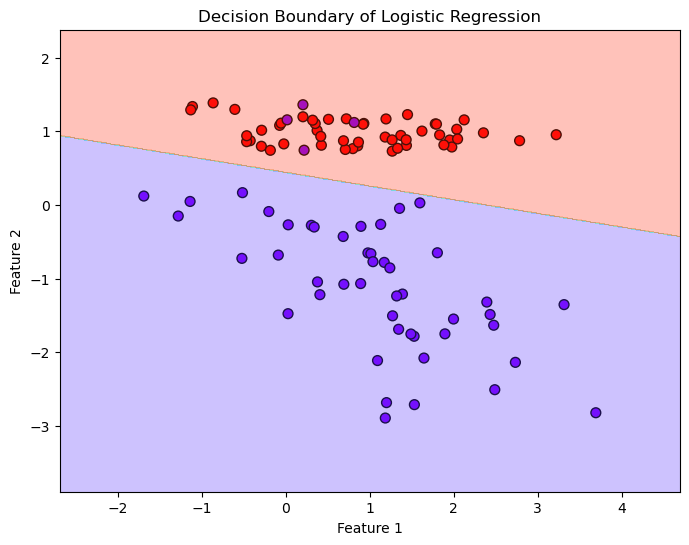

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k', s=50)
plt.title('Decision Boundary of Logistic Regression')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# np.meshgrid 生成二维坐标矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### 3. Probability Curve
The probability curve shows how the predicted probability changes with one of the predictors, keeping the other predictors constant.

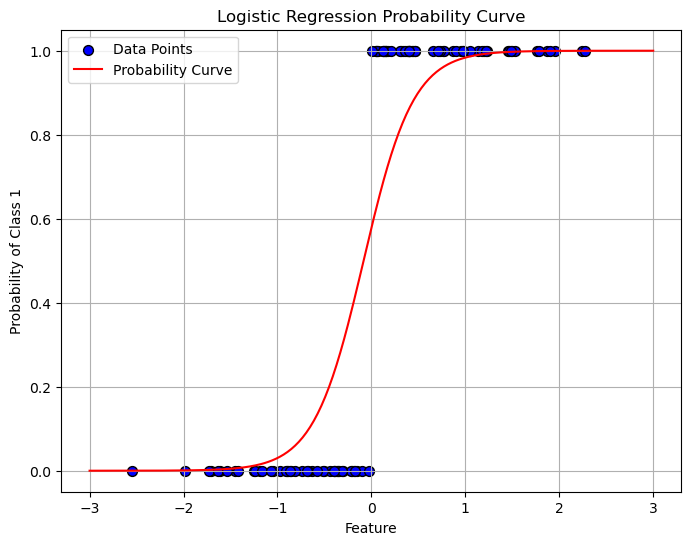

In [3]:
# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.normal(size=100)
y = (X > 0).astype(int)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X.reshape(-1, 1), y)

# Generate points for prediction
X_test = np.linspace(-3, 3, 300)
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plot data points and probability curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', edgecolor='k', s=50, label='Data Points')
plt.plot(X_test, y_prob, color='red', label='Probability Curve')
plt.title('Logistic Regression Probability Curve')
plt.xlabel('Feature')
plt.ylabel('Probability of Class 1')
plt.legend()
plt.grid(True)
plt.show()


This visualization demonstrates how the predicted probability of the positive class (Class 1) changes with the feature value. The red curve represents the logistic regression model's probability predictions.

**Blue Points**: Actual data points with their respective classes.  
**Red Curve**: The probability of the positive class predicted by the logistic regression model.

### 4. Coefficient Interpretation
Visualizing the impact of coefficients on the decision boundary can be insightful. Here’s an example with two features.

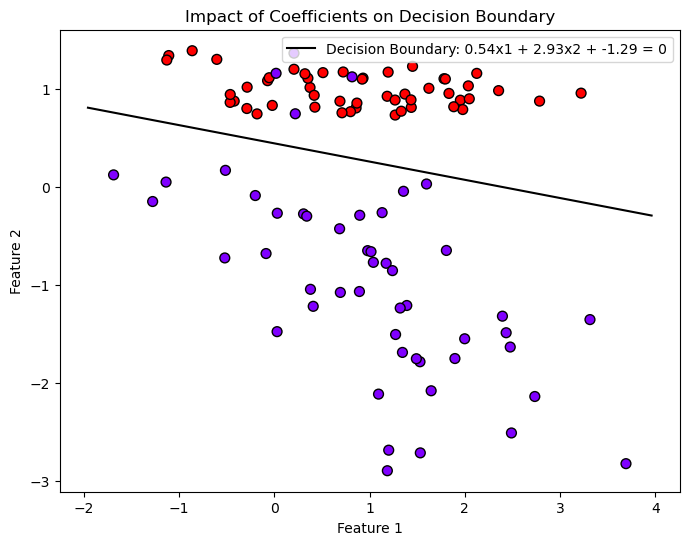

In [4]:
# Create synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k', s=50)
plt.title('Impact of Coefficients on Decision Boundary')

# Plot decision boundary
coef = model.coef_[0]
intercept = model.intercept_
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(x_vals * coef[0] + intercept) / coef[1]
plt.plot(x_vals, y_vals, c='k', label=f'Decision Boundary: {coef[0]:.2f}x1 + {coef[1]:.2f}x2 + {intercept[0]:.2f} = 0')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


This plot shows how the coefficients of the logistic regression model influence the decision boundary between the two classes.  

**Data Points**: Shown as colored markers (different colors for different classes).  

**Decision Boundary**: The black line represents the boundary where the model predicts a 50% probability for either class. It is determined by the logistic regression coefficients.

**Key Insights**:The slope of the decision boundary is influenced by the ratio of the coefficients of the features.  
The intercept shifts the decision boundary horizontally.

---

## Support Vector Machine

### 1. Linear SVM

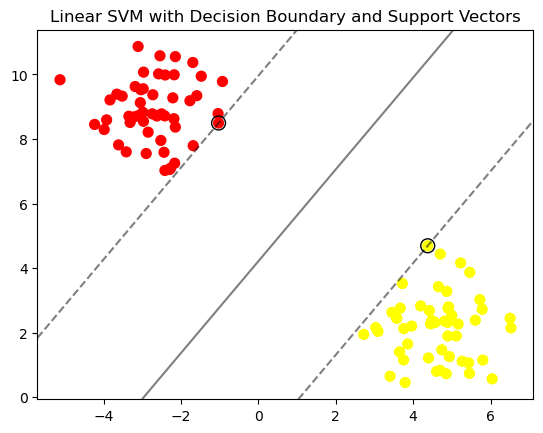

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate synthetic dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)

# Train an SVM model with a linear kernel
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Plot the hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Linear SVM with Decision Boundary and Support Vectors')
plt.show()


The solid line represents the decision boundary.  
The dashed lines represent the margins (distance from the decision boundary).  
Support vectors are shown as circled points.

### 2. Non-Linear SVM with RBF Kernel  
For datasets that are not linearly separable, we can use a non-linear kernel like the Radial Basis Function (RBF). Here's an example:

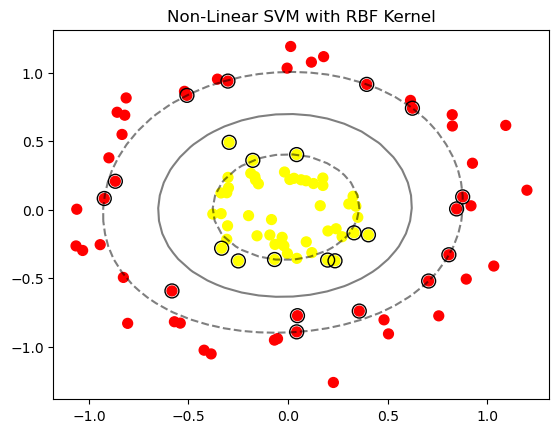

In [6]:
from sklearn.datasets import make_circles

# Generate synthetic dataset (circles)
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1)

# Train an SVM model with an RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma=1.0)
model.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Plot the hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Non-Linear SVM with RBF Kernel')
plt.show()


This plot shows how the RBF kernel can create a non-linear decision boundary to separate classes that are not linearly separable.

### 3. Effect of the C Parameter  
The C parameter in SVM controls the trade-off between having a larger margin and minimizing classification error. Here's how changing C affects the decision boundary:

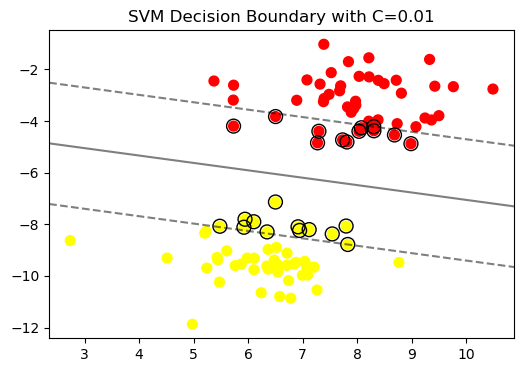

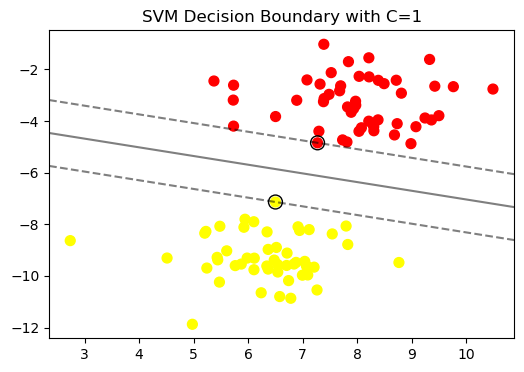

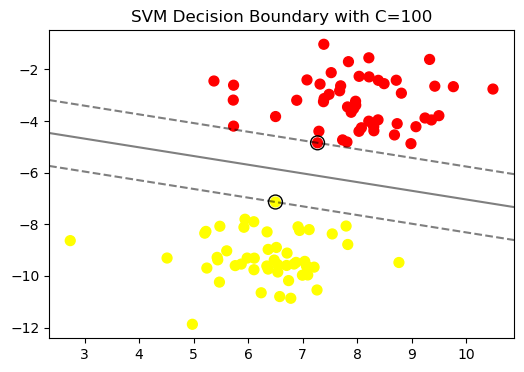

In [7]:
# Generate synthetic dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Plot for different values of C
for i, C in enumerate([0.01, 1, 100]):
    plt.figure(figsize=(6, 4))
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f'SVM Decision Boundary with C={C}')
    plt.show()


**Lower C values** result in wider margins but more misclassifications.  
**Higher C values** lead to narrower margins and fewer misclassifications, but the model might be more sensitive to noise.

### 4. Polynomial Kernel SVM  
A polynomial kernel can also be used for non-linear classification:

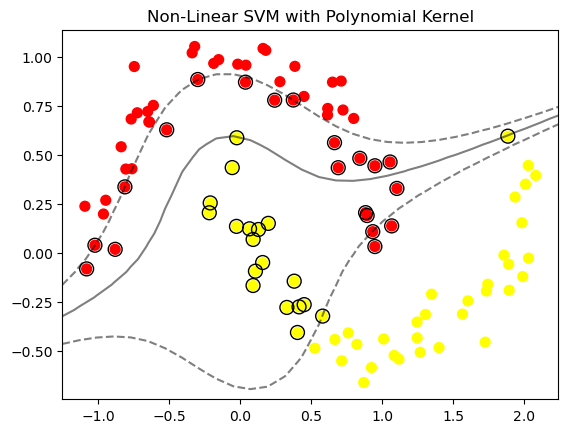

In [8]:
from sklearn.datasets import make_moons

# Generate synthetic dataset
X, y = make_moons(n_samples=100, noise=0.1)

# Train an SVM model with a polynomial kernel
model = SVC(kernel='poly', degree=3, C=1.0)
model.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Non-Linear SVM with Polynomial Kernel')
plt.show()


`make_moons`: This function is used to generate a synthetic two-dimensional dataset with two interleaving half circles (moons). It's often used to test classification algorithms on non-linearly separable data.  
This plot demonstrates how a polynomial kernel can fit a more complex boundary to separate the classes.

---  
---

# Tree-Based Methods

***Tips:  
Tree-based methods like Random Forest, Gradient Boosted Decision Trees (GBDT), and even individual Decision Trees can generate different results even when the other parameters are kept constant. This is due to the inherent randomness in the training process of these models.  
Parameter:`random_state` can help fix that.***

---

## Random Forest

### 1. Feature Importance Visualization
Visualizing feature importance helps understand which features contribute most to the prediction.

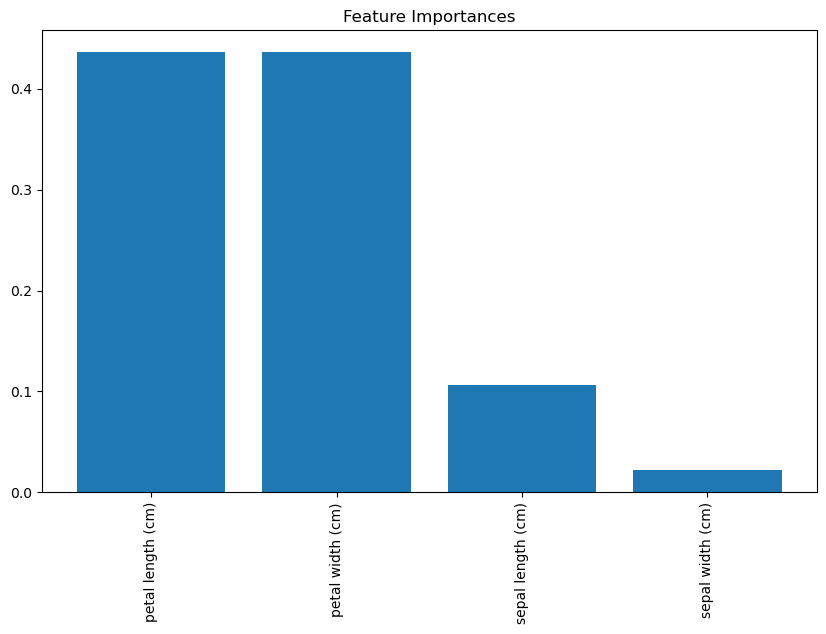

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.show()


Shows which features contribute the most to the predictions. The higher the bar, the more important the feature.

### 2. Decision Boundary Visualization in 2D
This example visualizes how a Random Forest classifier creates decision boundaries in a 2D space:

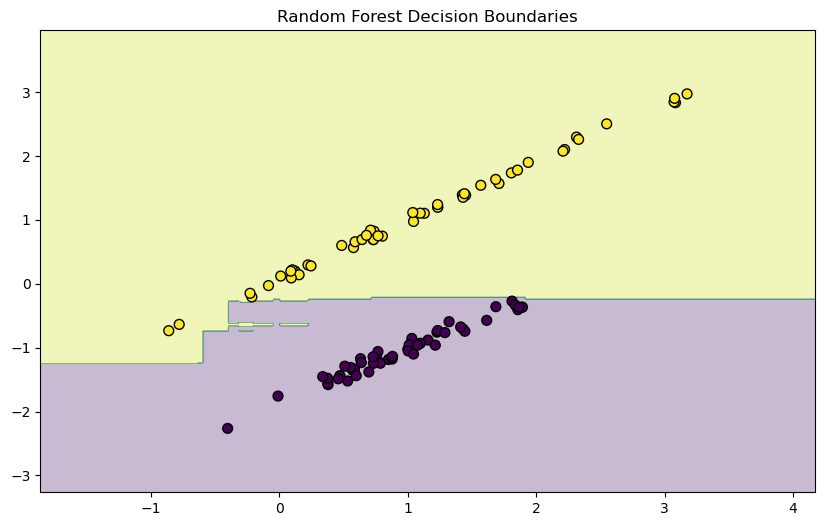

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.title("Random Forest Decision Boundaries")
plt.show()


Illustrates how Random Forest classifies different regions in a 2D space. This is useful for understanding how the model separates different classes.


### 3. Cumulative Feature Importance Plot
This plot shows the cumulative importance of features as you add them in order of importance.

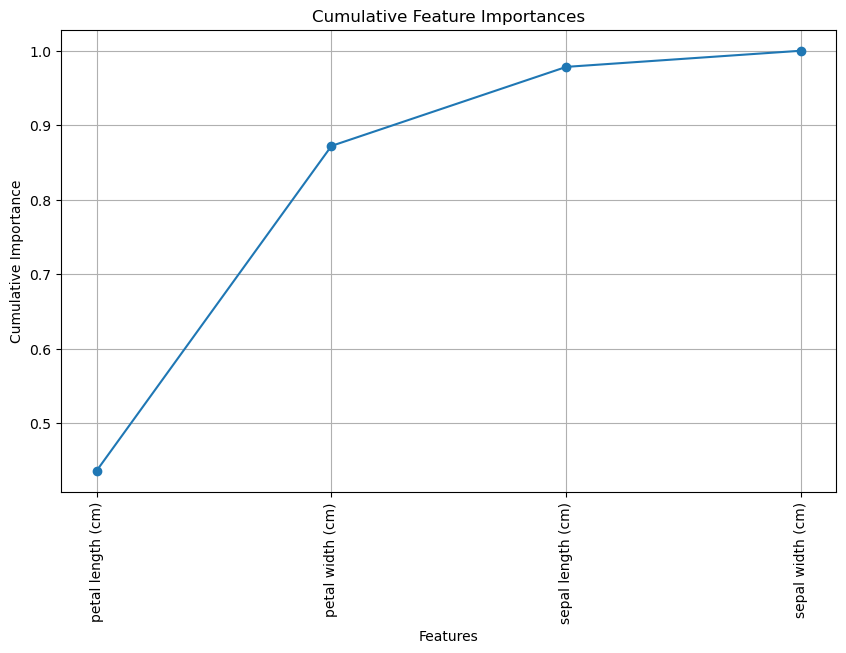

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
cumulative_importances = np.cumsum(importances[indices])

# Plot cumulative feature importances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importances) + 1), cumulative_importances, marker='o')
plt.xticks(range(1, len(cumulative_importances) + 1), np.array(iris.feature_names)[indices], rotation=90)
plt.title("Cumulative Feature Importances")
plt.xlabel("Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()


Demonstrates how the cumulative importance of features increases as more important features are added. This can help in feature selection.

### 4. Tree Visualization
Visualizing individual trees in a Random Forest helps understand how the model makes decisions.

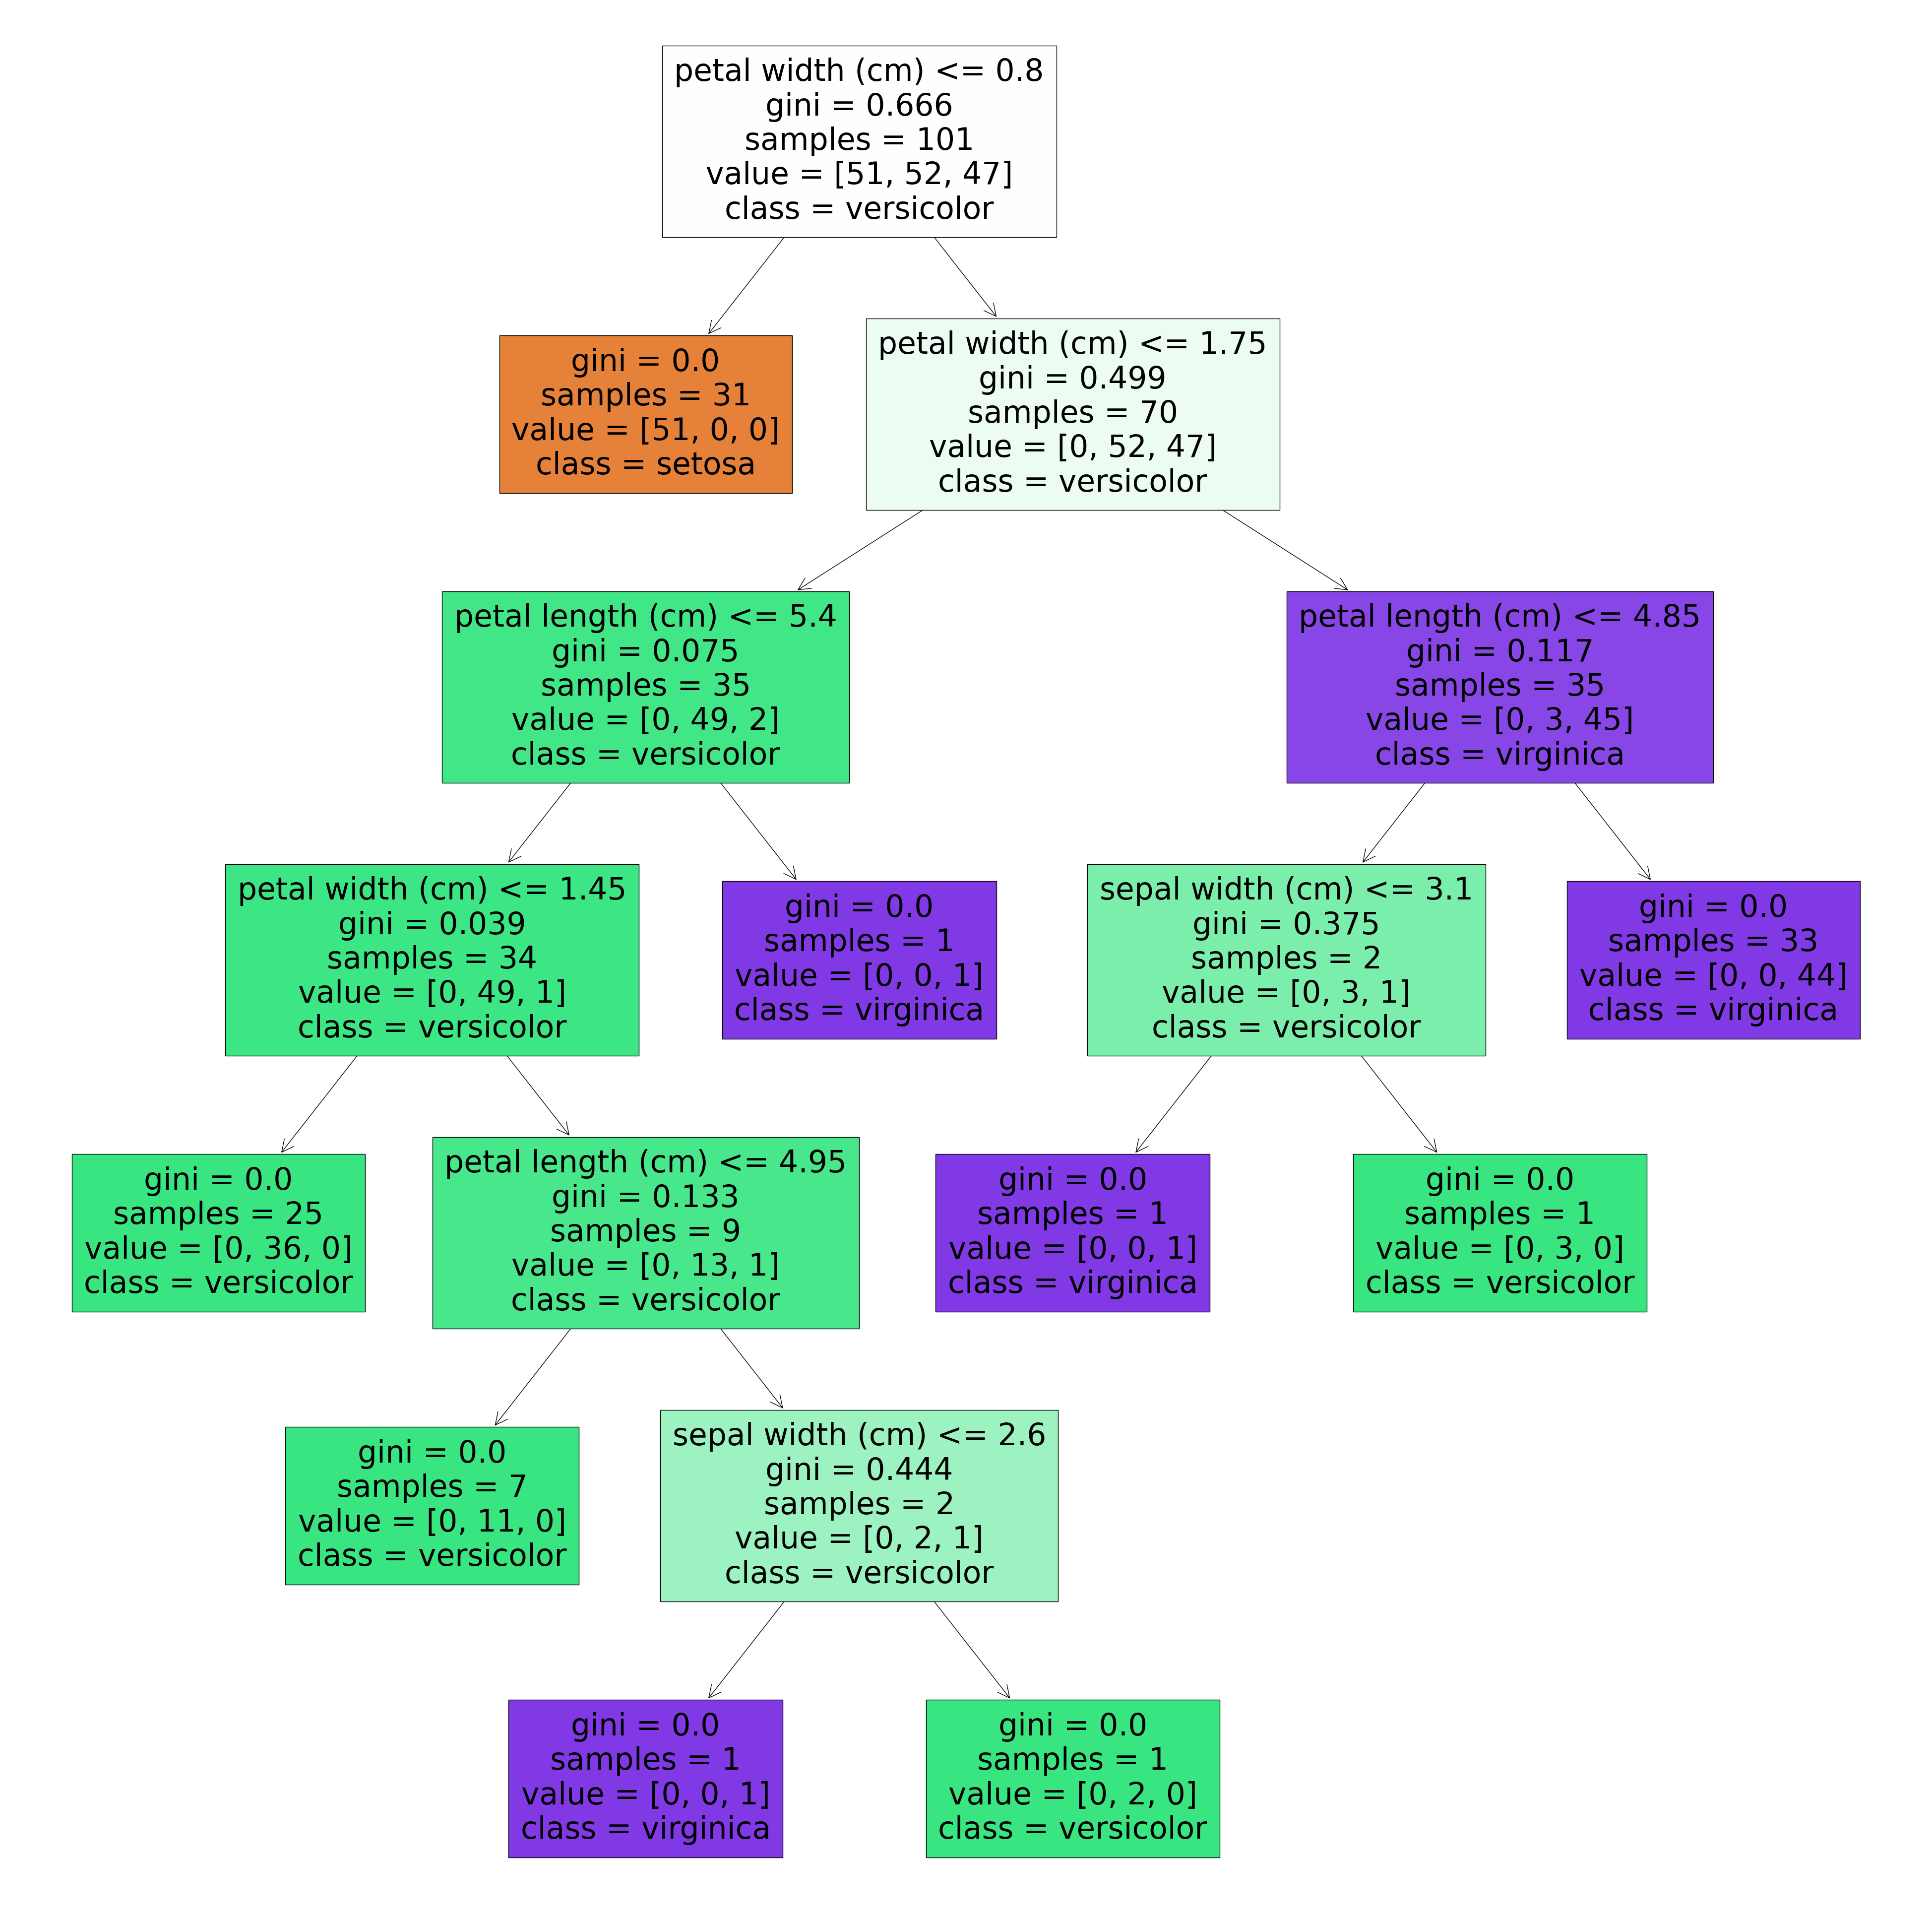

In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

# Visualize a single decision tree from the forest
plt.figure(figsize=(50, 50))
plot_tree(model.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Provides a detailed view of a single decision tree within the Random Forest, showing how decisions are made at each node.

### 5. Out-of-Bag (OOB) Error Visualization
Out-of-Bag error provides an estimate of the model's performance without needing a separate validation set.

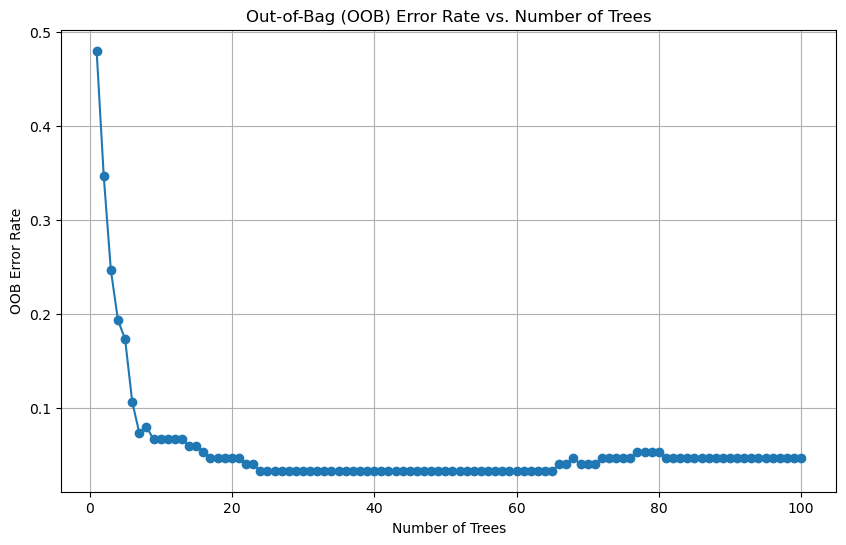

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train Random Forest model with OOB error enabled
oob_errors = []
n_estimators_options = range(1, 101)

for n_estimators in n_estimators_options:
    model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    model.fit(X, y)
    oob_errors.append(1 - model.oob_score_)

# Plot OOB error rate
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, oob_errors, marker='o')
plt.title("Out-of-Bag (OOB) Error Rate vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.grid(True)
plt.show()


Displays how the out-of-bag error rate decreases as the number of trees in the Random Forest increases, indicating the model's performance.

---

## Gredient Boosted Decision Trees

### 1. Feature Importance Visualization
Feature importance helps identify which features contribute the most to the model's predictions.

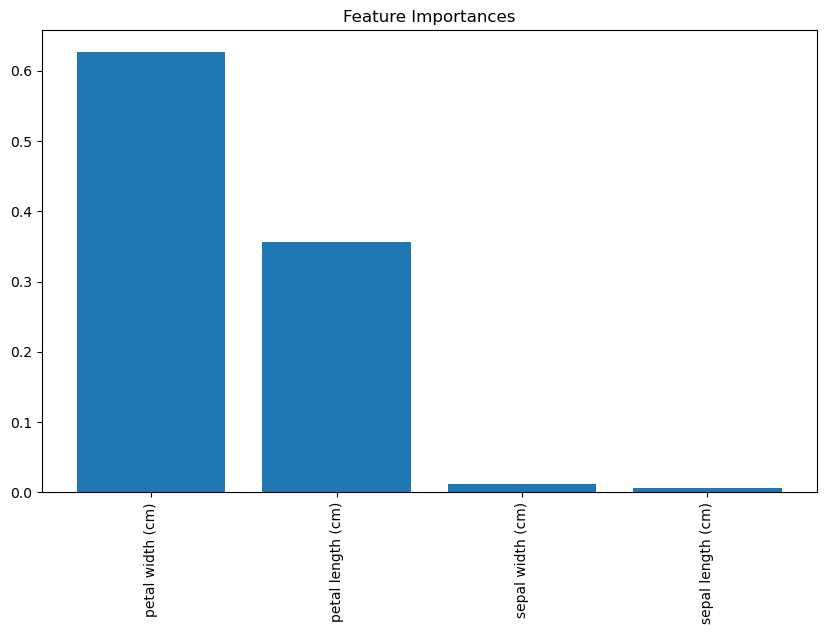

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.show()


This bar chart shows the importance of each feature in the dataset. Features with higher importance contribute more to the model's predictions.


***Q1. Feature Importance: Determined by Data or Model Training Process?***
The feature importance scores you see in the first visualization are determined by the model training process, not just by the data itself.   

Here’s how:  

**Data**: 
The data provides the raw information (features and target values) that the model uses to learn patterns.  

**Model Training Process**:
During training, the Gradient Boosted Decision Trees model learns to make predictions by sequentially adding decision trees that reduce the residual errors from previous trees. As part of this process, the model evaluates how much each feature contributes to reducing the loss function (e.g., Mean Squared Error for regression, Log Loss for classification).  

**Feature Importance Calculation**:  
The importance of a feature is calculated based on how much it helps reduce the loss function across all the trees in the ensemble.
In decision trees, a feature’s importance is often measured by the total reduction in impurity (e.g., Gini impurity or entropy) it brings when used for splitting. In GBDT, this is accumulated across all the trees.  
The more a feature is used to make key splits that lead to substantial reductions in the loss function, the higher its importance score.  

So, while the data provides the values, the model training process determines how useful each feature is in making accurate predictions, which is then reflected in the feature importance scores.  

### 2. Effect of Learning Rate on Model Performance
Visualizing how different learning rates affect the model's training and test performance.

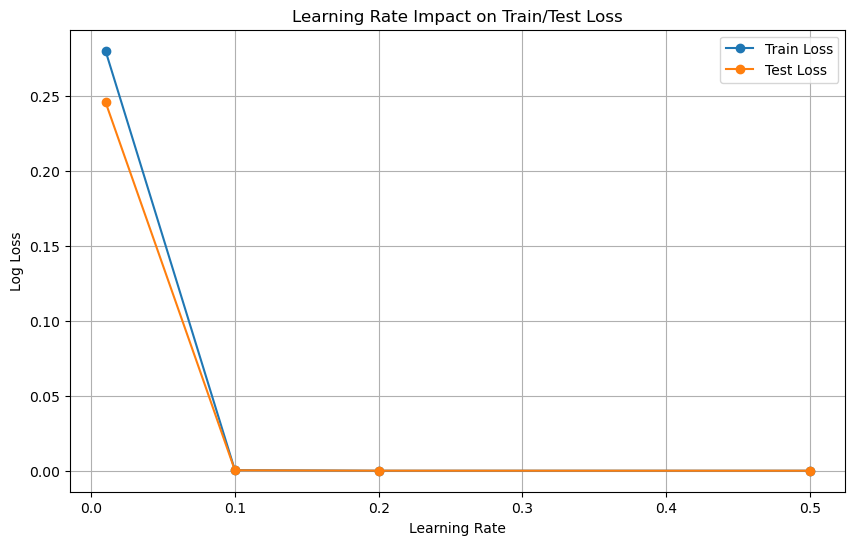

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate model performance with different learning rates
learning_rates = [0.01, 0.1, 0.2, 0.5]
train_results = []
test_results = []

for lr in learning_rates:
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    train_results.append(log_loss(y_train, model.predict_proba(X_train)))
    test_results.append(log_loss(y_test, model.predict_proba(X_test)))

# Plot learning rate impact
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_results, marker='o', label="Train Loss")
plt.plot(learning_rates, test_results, marker='o', label="Test Loss")
plt.title("Learning Rate Impact on Train/Test Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()


This plot illustrates how different learning rates impact the model's training and test loss. It shows that a lower learning rate often results in better generalization but requires more trees to achieve optimal performance.

***Q2. Why Might Log Loss Be Lower on Test Data Than on Training Data?***

Usually, accuracy (or log loss) is better on the training data than on the test data. However, there are scenarios where the log loss on the test set might be lower than on the training set:

**Accuracy and Log Loss**: While accuracy simply counts correct predictions, log loss also takes into account the confidence of the predictions. A model with a high confidence in correct predictions will have a low log loss, but if it's overconfident in wrong predictions, log loss increases significantly. Therefore, a model might achieve better log loss on a test set if it’s well-calibrated on that set.

**Typical Expectations**: In most cases, you would expect the model to perform better on the training set, so if you consistently see better performance on the test set, it might be worth investigating further, considering potential data leakage, model selection criteria, or anomalies in the data splits.

### 3. Decision Boundary Visualization
This visualization shows how GBDT creates decision boundaries in a 2D space.

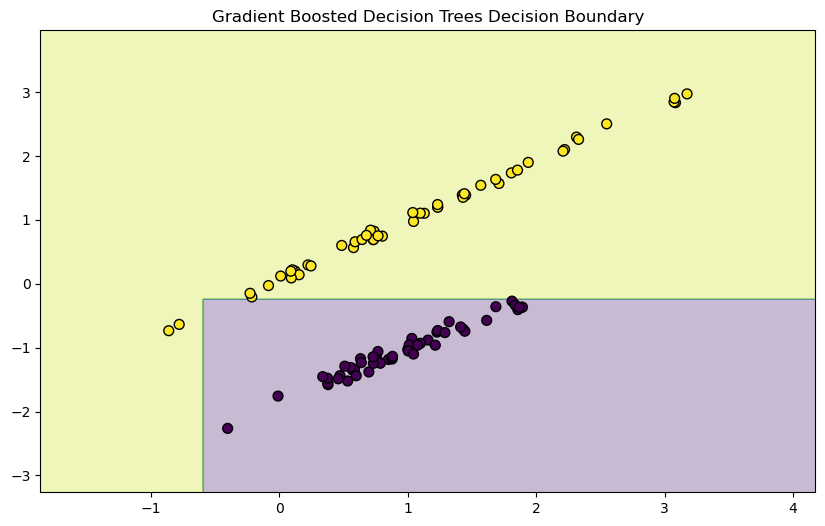

In [16]:
from sklearn.datasets import make_classification

# Generate synthetic dataset with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=42, n_clusters_per_class=1)

# Train a Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.title("Gradient Boosted Decision Trees Decision Boundary")
plt.show()


This contour plot shows the decision boundaries created by the GBDT model in a 2D space. It helps visualize how the model separates different classes based on the features.

### 4. Visualization of Trees in the Ensemble
Visualizing individual trees within the GBDT model to understand how each tree contributes to the model.

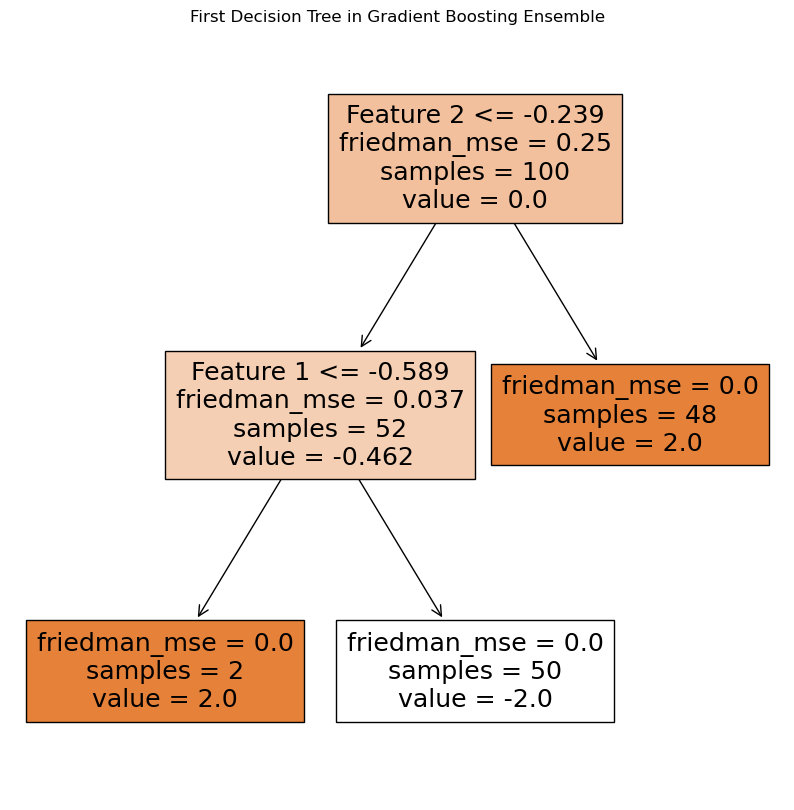

In [17]:
from sklearn.tree import plot_tree

# Visualize the first decision tree in the ensemble
plt.figure(figsize=(10,10))
plot_tree(model.estimators_[0, 0], feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title("First Decision Tree in Gradient Boosting Ensemble")
plt.show()


This plot shows the structure of the first decision tree in the GBDT ensemble. It helps understand how the tree splits the data and contributes to the overall prediction.

### 5. Effect of Number of Trees on Performance
Visualizing how the number of trees affects the training and testing accuracy of the model.

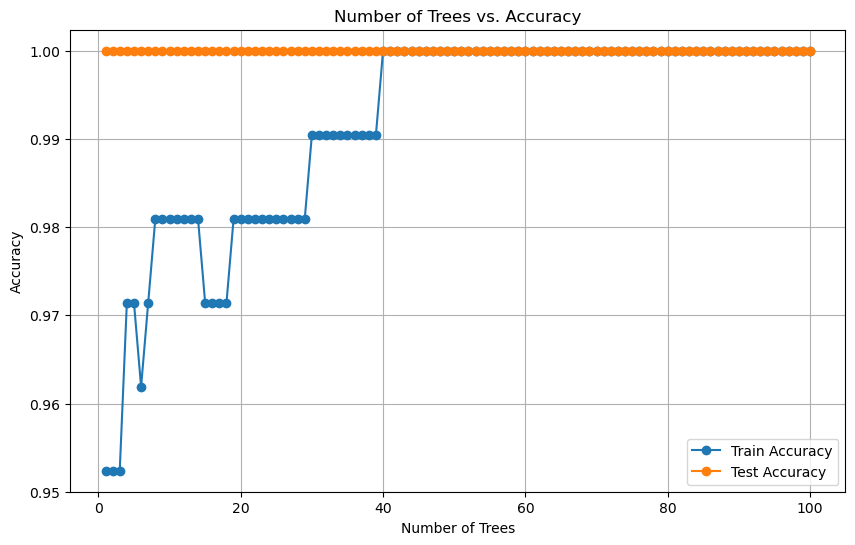

In [18]:
train_accuracy = []
test_accuracy = []
n_estimators_range = range(1, 101)

for n_estimators in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=2, random_state=42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# Plot accuracy vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracy, marker='o', label="Train Accuracy")
plt.plot(n_estimators_range, test_accuracy, marker='o', label="Test Accuracy")
plt.title("Number of Trees vs. Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


This line plot shows how the accuracy on the training sets changes as the number of trees in the model increases. It helps determine the optimal number of trees to avoid overfitting.

---
---

# Further Models

---

## KNN

### 1. Visualizing the Decision Boundary of KNN
This visualization shows how KNN classifies regions of the feature space based on the majority class of the nearest neighbors. We'll use a synthetic dataset with two features for simplicity.

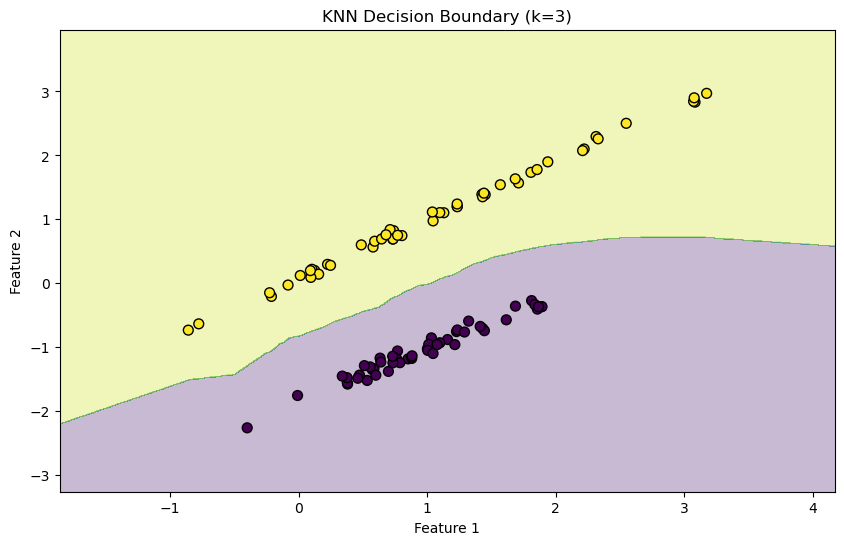

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate a synthetic dataset with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=42, n_clusters_per_class=1)

# Train KNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.title("KNN Decision Boundary (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Decision Boundary**: The contour plot shows the regions of the feature space classified into different classes. The color indicates the predicted class for that region.  
**Effect of k**: The decision boundary will change depending on the value of 
𝑘
. A smaller 
𝑘
 will lead to a more jagged boundary, while a larger 
𝑘
 will smooth it out.

### 2. Effect of Different k Values on Decision Boundary
Let's visualize how the decision boundary changes with different values of 
𝑘.



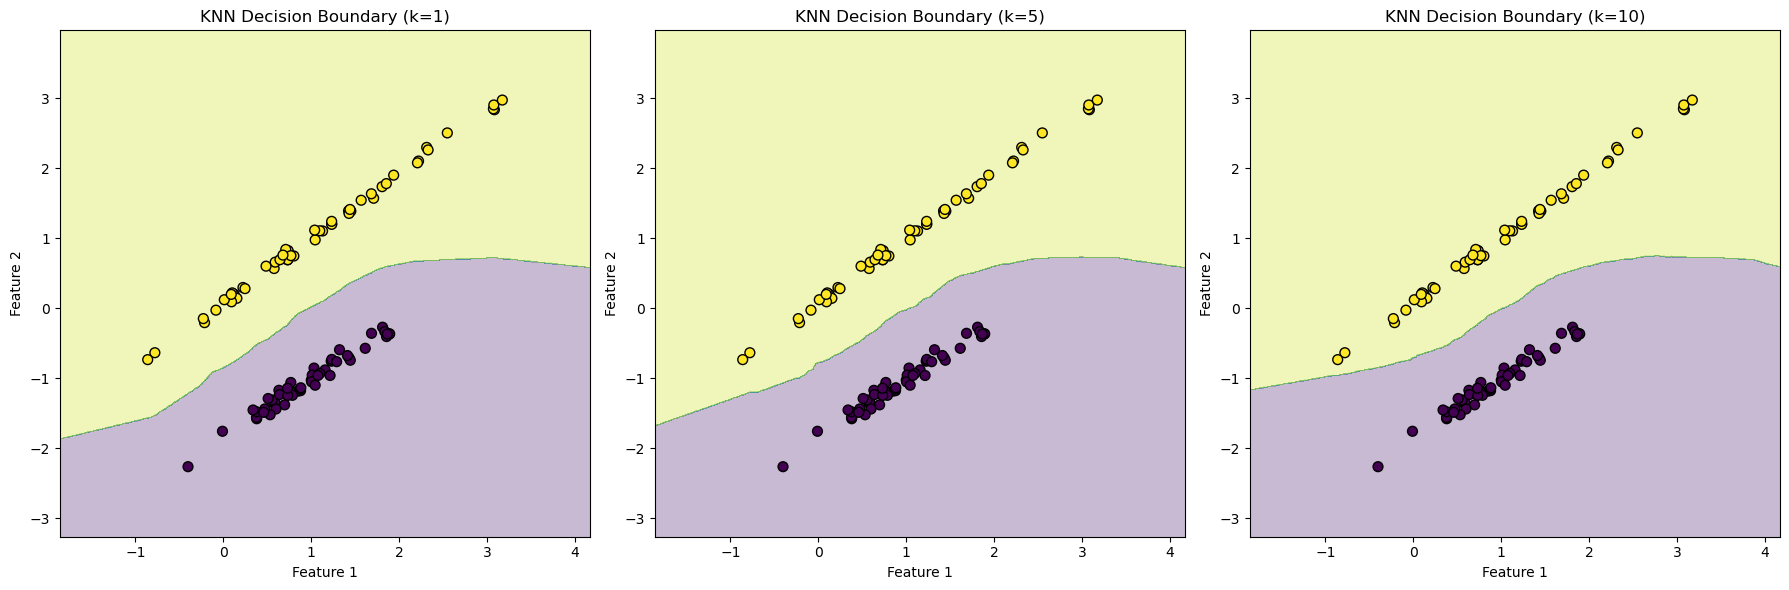

In [20]:
# Visualize decision boundaries for different values of k
k_values = [1, 5, 10]

plt.figure(figsize=(18, 6))

for i, k in enumerate(k_values):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


**k=1**: With 
𝑘
=
1
, the model is very sensitive to noise, leading to a very complex decision boundary.  
**k=5 and k=10**: As 
𝑘
increases, the decision boundary becomes smoother and more generalized, reducing the model’s sensitivity to individual data points.

### 3. Visualizing the Influence of Distance in KNN
This visualization shows how the distances between a query point and its neighbors influence the classification.

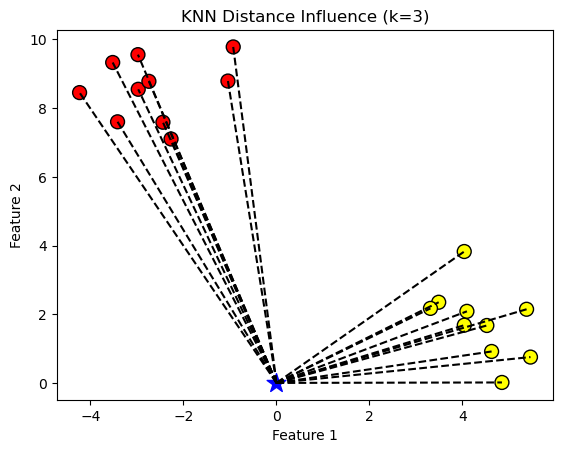

In [21]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate a synthetic dataset with two clusters
X, y = make_blobs(n_samples=20, centers=2, random_state=42)

# Train KNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Define a query point
query_point = np.array([[0, 0]])

# Plot the data points and the query point
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolor='k')
plt.scatter(query_point[:, 0], query_point[:, 1], c='blue', s=200, marker='*')

# Draw lines from the query point to the nearest neighbors
for i in range(len(X)):
    plt.plot([query_point[0, 0], X[i, 0]], [query_point[0, 1], X[i, 1]], 'k--')

plt.title("KNN Distance Influence (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Query Point**: The blue star represents a new query point. The lines show the distance between the query point and the existing data points.  
**Neighbor Influence**: In KNN, the closest neighbors have the most influence on the classification of the query point. If weighted KNN were used, closer points would have even more influence.

### 4. Plotting Accuracy vs. k
This visualization shows how the accuracy of the KNN model changes as the value of 
𝑘
varies.



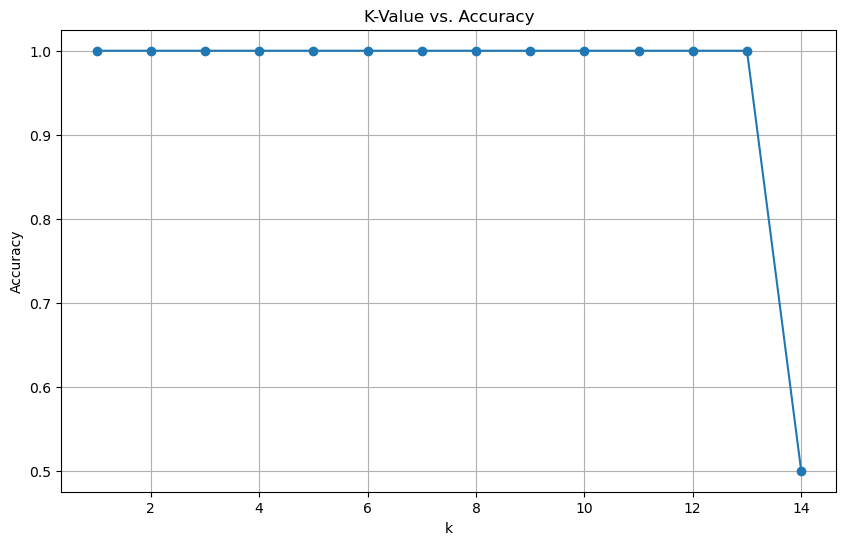

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different values of k to see which gives the best accuracy
accuracies = []
k_values = range(1, 15)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("K-Value vs. Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


**Optimal k**: The plot helps identify the optimal 
𝑘
 that maximizes the accuracy on the test set(accuracy performance is determined on paticular dataset).   
**Effect of Large k**: As 
𝑘
 increases, the model might start underfitting, leading to a drop in accuracy.

### 5. KNN Regression Visualization
KNN can also be used for regression. Here’s a visualization of how KNN performs regression by averaging the values of the nearest neighbors.

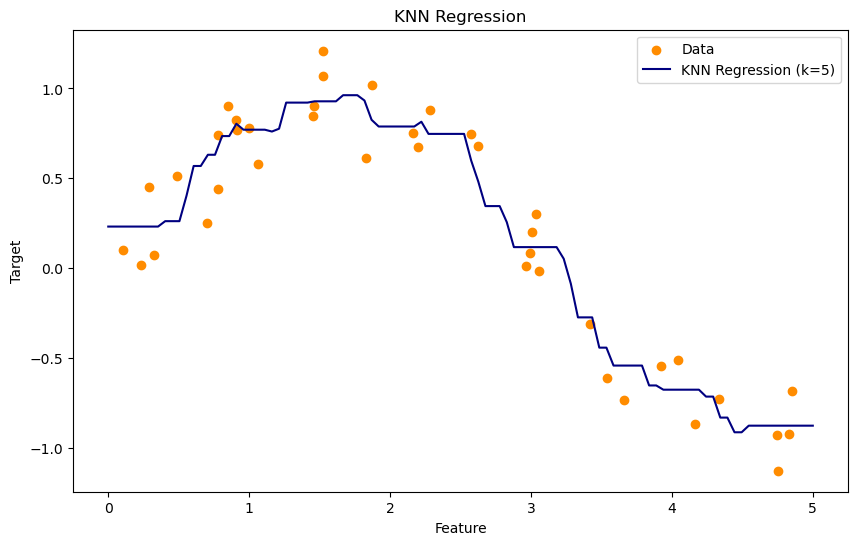

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate a simple dataset for regression
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Query points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]

# Train KNN regressor
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)

# Predict the values for the test set
y_pred = knn.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X_test, y_pred, color='navy', label=f'KNN Regression (k={k})')
plt.title("KNN Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


**KNN Regression**: The blue line shows the predicted values using KNN regression. The model predicts the target value by averaging the target values of the 
𝑘
nearest neighbors.  
**Smoothness**: The smoothness of the regression line depends on 
𝑘.
 A larger 
𝑘
would smooth the line further, possibly at the cost of capturing fine details.

---

# Neural Networks

Supposedly neural networks need to run in a virtual environment due to its complex package dependency, which is not available in jupyter yet. Here is a link to the tensorflow visualization as follow.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2,2&seed=0.36680&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false